<a href="https://colab.research.google.com/github/grupos4g4/PROJEAPLIC3/blob/main/Projeto_Aplicado_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Manipulação de arquivos e diretórios
import os
import shutil
import random
import re

# Manipulação de imagens
import cv2
from PIL import Image

# Bibliotecas científicas e numéricas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PyTorch e deep learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from torchvision.models import ResNet50_Weights

# Machine learning e métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Barras
from tqdm import tqdm  # Barra de progresso
from collections import defaultdict

In [3]:
dir_principal = r"/content/drive/MyDrive/projeto_aplicado3/dataset_dividido"

In [4]:
for root, dirs, files in os.walk(dir_principal):
    print(f'Diretório: {root}')  # Exibe o diretório atual
    for filename in files:
        print(f'  Encontrado arquivo: {filename}')  # Exibe cada arquivo encontrado

A saída de streaming foi truncada nas últimas 5000 linhas.
  Encontrado arquivo: Image_166.jpg
  Encontrado arquivo: Image_177.jpg
  Encontrado arquivo: Image_180.jpg
  Encontrado arquivo: Image_195.jpg
  Encontrado arquivo: Image_209.jpg
  Encontrado arquivo: Image_21.jpg
  Encontrado arquivo: Image_200.jpg
  Encontrado arquivo: Image_229.jpg
  Encontrado arquivo: Image_250.jpg
  Encontrado arquivo: Image_24.jpg
  Encontrado arquivo: Image_246.jpg
  Encontrado arquivo: Image_237.jpg
  Encontrado arquivo: Image_279.jpg
  Encontrado arquivo: Image_262.jpg
  Encontrado arquivo: Image_266.jpg
  Encontrado arquivo: Image_265.jpg
  Encontrado arquivo: Image_282.jpg
  Encontrado arquivo: Image_288.jpg
  Encontrado arquivo: Image_294.jpg
  Encontrado arquivo: Image_299.jpg
  Encontrado arquivo: Image_29.jpg
  Encontrado arquivo: Image_48.jpg
  Encontrado arquivo: Image_70.jpg
  Encontrado arquivo: Image_41.jpg
  Encontrado arquivo: Image_87.jpg
Diretório: /content/drive/MyDrive/projeto_aplica

In [5]:
dataset = r"/content/drive/MyDrive/projeto_aplicado3/dataset_dividido"

In [6]:
# Dicionário para armazenar a contagem de imagens por fruta
fruit_counts = defaultdict(int)

# Contador para total geral de imagens
total_images = 0

image_extensions = ('.png', '.jpg', '.jpeg')

# Função para normalizar o nome da fruta
def normalize_fruit_name(name):
    # Extrai a parte principal do nome da fruta
    match = re.match(r'^(apple).*', name, re.IGNORECASE)
    return match.group(1).lower() if match else name.lower()

# Percorrendo todas as subpastas e arquivos
for root, dirs, files in os.walk(dataset):
    for filename in files:
        if filename.lower().endswith(image_extensions):  # Verifica se o arquivo é uma imagem PNG
            # Normaliza o nome da fruta a partir da subpasta
            fruit_name = normalize_fruit_name(os.path.basename(root))
            # Incrementa a contagem para a fruta correspondente
            fruit_counts[fruit_name] += 1
            # Incrementa o contador total de imagens
            total_images += 1
# Exibindo os resultados
print("Total de imagens por tipo de fruta:")
for fruit, count in fruit_counts.items():
    print(f'Total de imagens para {fruit}: {count}')
# Exibindo o total geral de imagens
print(f"\nTotal geral de imagens: {total_images}")

Total de imagens por tipo de fruta:
Total de imagens para abacaxi: 260
Total de imagens para acerola: 296
Total de imagens para amora: 261
Total de imagens para caju: 285
Total de imagens para banana: 254
Total de imagens para ameixa: 258
Total de imagens para carambola: 261
Total de imagens para cereja: 250
Total de imagens para coco: 191
Total de imagens para goiaba: 276
Total de imagens para cupuaçu: 246
Total de imagens para framboesa: 270
Total de imagens para figo: 245
Total de imagens para kiwi: 207
Total de imagens para graviola: 251
Total de imagens para jabuticaba: 294
Total de imagens para laranja: 238
Total de imagens para limão: 253
Total de imagens para mamão: 243
Total de imagens para mirtilo: 186
Total de imagens para maçã: 207
Total de imagens para manga: 140
Total de imagens para maracujá: 157
Total de imagens para pêssego: 109
Total de imagens para pera: 172
Total de imagens para pitanga: 166
Total de imagens para morango: 222
Total de imagens para tamarindo: 

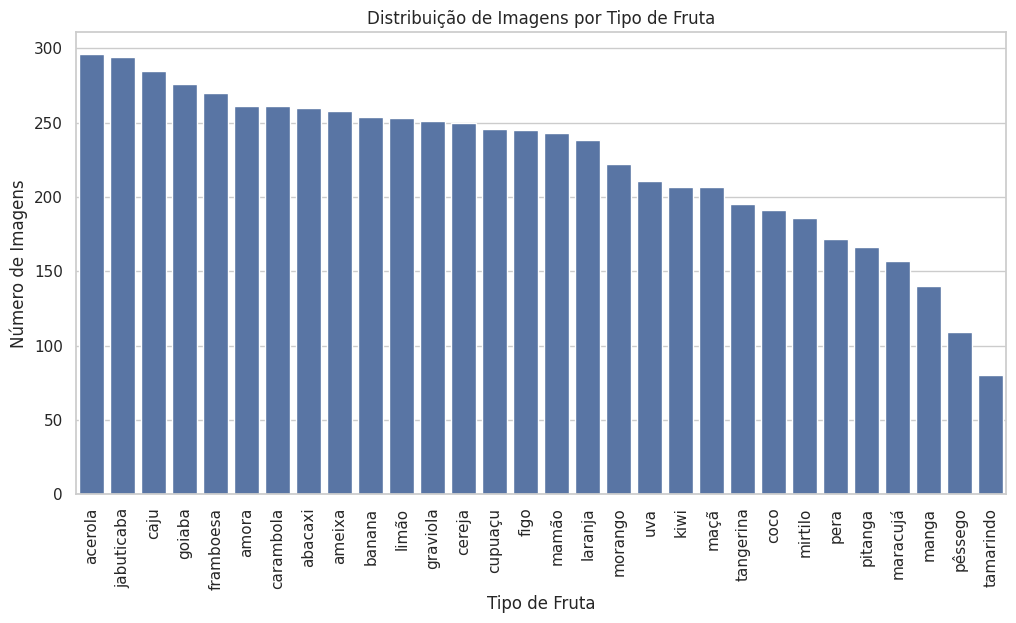

In [7]:
fruit_df = pd.DataFrame(list(fruit_counts.items()), columns=['Fruit', 'Count'])
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Fruit', y='Count', data=fruit_df.sort_values('Count', ascending=False))
plt.xticks(rotation=90)
plt.title('Distribuição de Imagens por Tipo de Fruta')
plt.xlabel('Tipo de Fruta')
plt.ylabel('Número de Imagens')
plt.show()

In [8]:
# Criando um DataFrame a partir do dicionário de contagens de frutas
fruit_df = pd.DataFrame(fruit_counts.items(), columns=['Fruit', 'Count'])

# Exibindo as primeiras linhas do DataFrame
print(fruit_df.head())

# Exibindo informações gerais do DataFrame
print(fruit_df.info())

# Exibindo estatísticas descritivas
print(fruit_df.describe())

     Fruit  Count
0  abacaxi    260
1  acerola    296
2    amora    261
3     caju    285
4   banana    254
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fruit   30 non-null     object
 1   Count   30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes
None
            Count
count   30.000000
mean   222.800000
std     53.851264
min     80.000000
25%    192.000000
50%    244.000000
75%    259.500000
max    296.000000


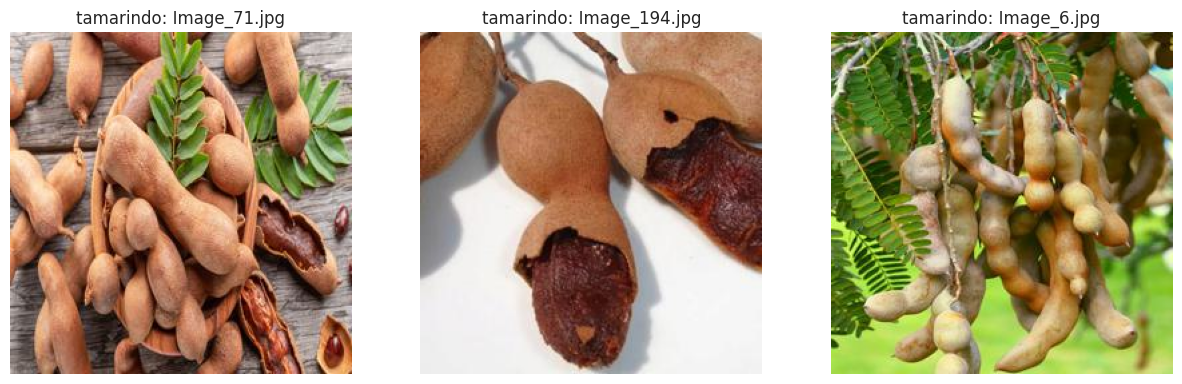

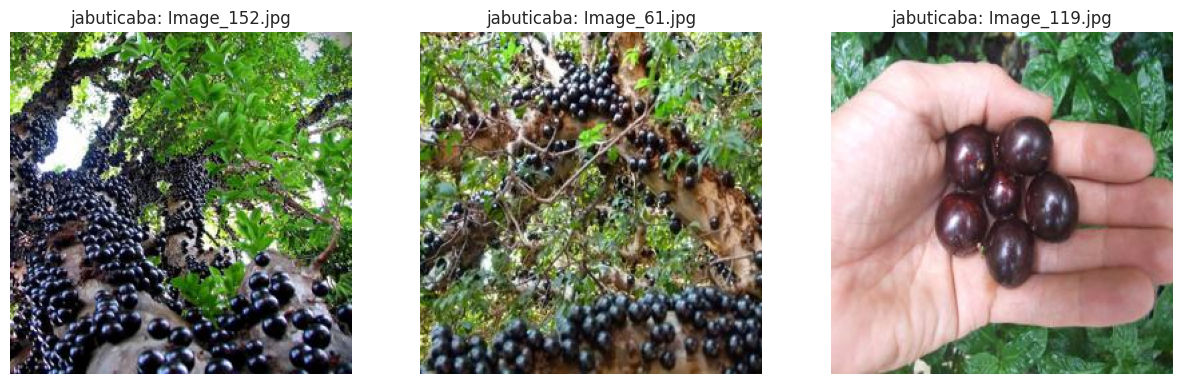

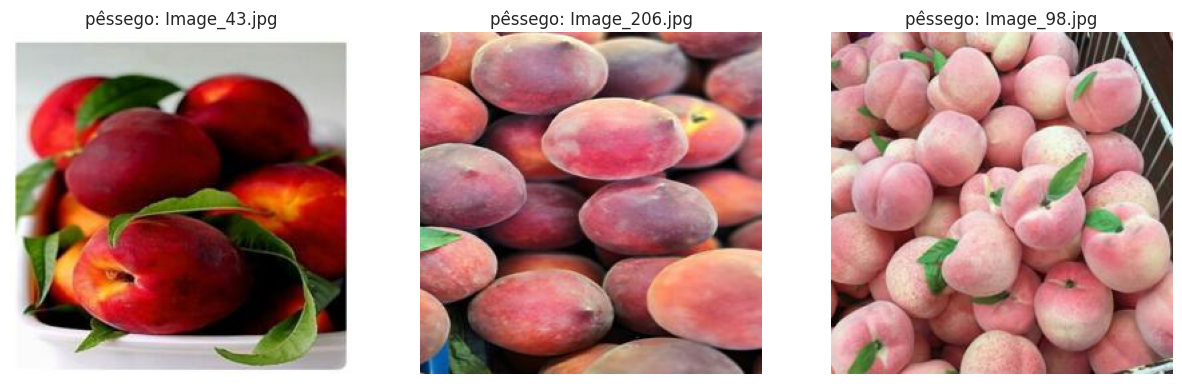

In [9]:
# Função para mostrar imagens aleatórias
def show_random_images(fruit_name, dataset, num_images=3):
    # Caminho da pasta da fruta
    fruit_path = os.path.join(dataset, fruit_name)

    # Verifica se o diretório existe
    if not os.path.isdir(fruit_path):
        print(f"Aviso: Diretório não encontrado para {fruit_name}")
        return

    # Lista arquivos de imagem na pasta
    images = [img for img in os.listdir(fruit_path) if img.lower().endswith(image_extensions)]

    # Se não houver imagens, exibe um aviso
    if not images:
        print(f"Aviso: Nenhuma imagem encontrada para {fruit_name}")
        return

    # Seleciona aleatoriamente as imagens
    selected_images = random.sample(images, min(num_images, len(images)))

    # Plotando as imagens
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(fruit_path, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{fruit_name}: {img_name}')
    plt.show()

# Caminho do dataset
dataset_path = r"/content/drive/MyDrive/projeto_aplicado3/dataset_dividido/train"

# Mostrando amostras para algumas frutas
for fruit in fruit_df['Fruit'].sample(n=3, random_state=42).values:  # Seleciona aleatoriamente 3 frutas
    show_random_images(fruit, dataset_path)

In [10]:
def listar_subdiretorios(dir):
    return [os.path.join(dir, nome)
        for nome in os.listdir(dir)
            if os.path.isdir(os.path.join(dir, nome))]

data_dir = listar_subdiretorios(dir_principal)

In [11]:
base_dest_dir = r"/content/drive/MyDrive/projeto_aplicado3/dataset_dividido"
train_dir, val_dir, test_dir = [os.path.join(base_dest_dir, x) for x in ['train', 'val', 'test']]
# Função para contar imagens em um diretório
def contar_imagens(dir):
    return sum([len(files) for _, _, files in os.walk(dir)])

# Contar e exibir as imagens em cada conjunto
for dir_name, dir_path in zip(["treino", "validação", "teste"], [train_dir, val_dir, test_dir]):
    print(f"Número total de imagens no conjunto de {dir_name}: {contar_imagens(dir_path)}")

Número total de imagens no conjunto de treino: 4672
Número total de imagens no conjunto de validação: 986
Número total de imagens no conjunto de teste: 1026


In [12]:
# Contar as imagens em cada conjunto
num_train = contar_imagens(train_dir)
num_val = contar_imagens(val_dir)
num_test = contar_imagens(test_dir)

# Número total de imagens
total_imagens = num_train + num_val + num_test

# Calcular porcentagens
porc_train = (num_train / total_imagens) * 100
porc_val = (num_val / total_imagens) * 100
porc_test = (num_test / total_imagens) * 100

# Exibir os resultados
print(f"Número total de imagens: {total_imagens}")
print(f"Treino: {num_train} imagens ({porc_train:.2f}%)")
print(f"Validação: {num_val} imagens ({porc_val:.2f}%)")
print(f"Teste: {num_test} imagens ({porc_test:.2f}%)")

Número total de imagens: 6684
Treino: 4672 imagens (69.90%)
Validação: 986 imagens (14.75%)
Teste: 1026 imagens (15.35%)


In [13]:
# Definir as transformações para os dados
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),  # Aumento de dados
        transforms.ToTensor(),  # Converter para tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalizar com média e desvio padrão de ImageNet
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Carregar os dados
image_datasets = {x: datasets.ImageFolder(root=f'{base_dest_dir}/{x}', transform=data_transforms[x])
                  for x in ['train', 'val']}


# DataLoaders para carregar os dados em lotes
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4)
               for x in ['train', 'val']}

# Número de classes no dataset
num_classes = len(image_datasets['train'].classes)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [14]:
# Carregar o modelo ResNet50 com os pesos mais recentes do ImageNet
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Congelar as camadas convolucionais
for param in model.parameters():
    param.requires_grad = False

# Substituir a última camada para o número correto de classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

# Enviar o modelo para a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s]


In [15]:
#verificanso a GPU
print(torch.cuda.is_available())

True


In [16]:
# Definir a função de perda
criterion = nn.CrossEntropyLoss()

# Definir o otimizador (apenas para os parâmetros da última camada)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [17]:
# Função para treinar o modelo com barra de progresso
def train_model(model, criterion, optimizer, dataloaders, device, num_epochs=10):
    model.train()  # Colocar o modelo em modo de treino

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")  # Exibir o número da época
        running_loss = 0.0
        running_corrects = 0
        total_samples = len(dataloaders['train'].dataset)

        # Criar a barra de progresso
        progress_bar = tqdm(dataloaders['train'], desc="Treinando", unit="batch")

        for inputs, labels in progress_bar:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zerar os gradientes
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass e otimização
            loss.backward()
            optimizer.step()

            # Estatísticas
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            # Atualizar barra de progresso com a loss atual
            progress_bar.set_postfix(loss=loss.item())

        # Calcular métricas da época
        epoch_loss = running_loss / total_samples
        epoch_acc = running_corrects.double() / total_samples

        # Exibir estatísticas da época
        print(f" Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

# Treinar o modelo
train_model(model, criterion, optimizer, dataloaders, device, num_epochs=10)


Epoch 1/10


Treinando: 100%|██████████| 146/146 [07:10<00:00,  2.95s/batch, loss=1.24]


 Loss: 1.6762, Accuracy: 0.5997

Epoch 2/10


Treinando: 100%|██████████| 146/146 [00:25<00:00,  5.72batch/s, loss=0.881]


 Loss: 0.7486, Accuracy: 0.8127

Epoch 3/10


Treinando: 100%|██████████| 146/146 [00:25<00:00,  5.83batch/s, loss=0.525]


 Loss: 0.5766, Accuracy: 0.8474

Epoch 4/10


Treinando: 100%|██████████| 146/146 [00:23<00:00,  6.26batch/s, loss=0.548]


 Loss: 0.4776, Accuracy: 0.8671

Epoch 5/10


Treinando: 100%|██████████| 146/146 [00:25<00:00,  5.80batch/s, loss=0.402]


 Loss: 0.4146, Accuracy: 0.8825

Epoch 6/10


Treinando: 100%|██████████| 146/146 [00:24<00:00,  5.88batch/s, loss=0.169]


 Loss: 0.3735, Accuracy: 0.8962

Epoch 7/10


Treinando: 100%|██████████| 146/146 [00:24<00:00,  5.95batch/s, loss=0.349]


 Loss: 0.3239, Accuracy: 0.9110

Epoch 8/10


Treinando: 100%|██████████| 146/146 [00:23<00:00,  6.19batch/s, loss=0.306]


 Loss: 0.3093, Accuracy: 0.9144

Epoch 9/10


Treinando: 100%|██████████| 146/146 [00:24<00:00,  5.92batch/s, loss=0.298]


 Loss: 0.2899, Accuracy: 0.9161

Epoch 10/10


Treinando: 100%|██████████| 146/146 [00:25<00:00,  5.75batch/s, loss=0.393]

 Loss: 0.2489, Accuracy: 0.9296


In [18]:
def evaluate_model(model, dataloaders, device):
    model.eval()  # Colocar o modelo em modo de avaliação
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    accuracy = running_corrects.double() / len(dataloaders['val'].dataset)
    print(f'Validation Accuracy: {accuracy:.4f}')

# Avaliar o modelo no conjunto de validação
evaluate_model(model, dataloaders, device)

Validation Accuracy: 0.8742


In [19]:
# Descongelar todas as camadas
for param in model.parameters():
    param.requires_grad = True

# Compilar o otimizador para ajustar todas as camadas agora
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Treinar novamente o modelo com fine-tuning
train_model(model, criterion, optimizer, dataloaders, device, num_epochs=10)


Epoch 1/10


Treinando: 100%|██████████| 146/146 [00:48<00:00,  3.02batch/s, loss=0.175]


 Loss: 0.1998, Accuracy: 0.9458

Epoch 2/10


Treinando: 100%|██████████| 146/146 [00:47<00:00,  3.08batch/s, loss=0.132]


 Loss: 0.1032, Accuracy: 0.9807

Epoch 3/10


Treinando: 100%|██████████| 146/146 [00:48<00:00,  3.02batch/s, loss=0.0458]


 Loss: 0.0639, Accuracy: 0.9895

Epoch 4/10


Treinando: 100%|██████████| 146/146 [00:47<00:00,  3.07batch/s, loss=0.0324]


 Loss: 0.0460, Accuracy: 0.9936

Epoch 5/10


Treinando: 100%|██████████| 146/146 [00:47<00:00,  3.05batch/s, loss=0.0403]


 Loss: 0.0347, Accuracy: 0.9949

Epoch 6/10


Treinando: 100%|██████████| 146/146 [00:47<00:00,  3.04batch/s, loss=0.0169]


 Loss: 0.0259, Accuracy: 0.9966

Epoch 7/10


Treinando: 100%|██████████| 146/146 [00:47<00:00,  3.07batch/s, loss=0.0461]


 Loss: 0.0245, Accuracy: 0.9966

Epoch 8/10


Treinando: 100%|██████████| 146/146 [00:48<00:00,  3.02batch/s, loss=0.0108]


 Loss: 0.0193, Accuracy: 0.9974

Epoch 9/10


Treinando: 100%|██████████| 146/146 [00:47<00:00,  3.06batch/s, loss=0.00618]


 Loss: 0.0182, Accuracy: 0.9972

Epoch 10/10


Treinando: 100%|██████████| 146/146 [00:48<00:00,  3.04batch/s, loss=0.0114]

 Loss: 0.0157, Accuracy: 0.9972


Validation Accuracy: 0.9249


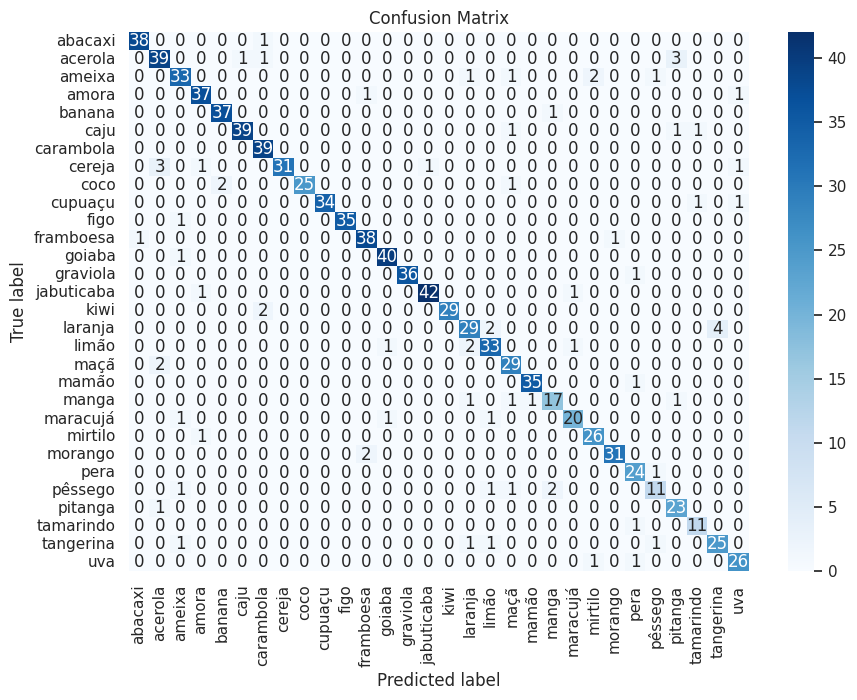

              precision    recall  f1-score   support

     abacaxi       0.97      0.97      0.97        39
     acerola       0.87      0.89      0.88        44
      ameixa       0.87      0.87      0.87        38
       amora       0.93      0.95      0.94        39
      banana       0.95      0.97      0.96        38
        caju       0.97      0.93      0.95        42
   carambola       0.91      1.00      0.95        39
      cereja       1.00      0.84      0.91        37
        coco       1.00      0.89      0.94        28
    cupuaçu       1.00      0.94      0.97        36
        figo       1.00      0.97      0.99        36
   framboesa       0.93      0.95      0.94        40
      goiaba       0.95      0.98      0.96        41
    graviola       1.00      0.97      0.99        37
  jabuticaba       0.98      0.95      0.97        44
        kiwi       1.00      0.94      0.97        31
     laranja       0.85      0.83      0.84        35
      limão       0.87    

In [20]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_model_with_metrics(model, dataloaders, device, class_names):
    model.eval()  # Colocar o modelo em modo de avaliação
    running_corrects = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            running_corrects += torch.sum(preds == labels.data)

    accuracy = running_corrects.double() / len(dataloaders['val'].dataset)
    print(f'Validation Accuracy: {accuracy:.4f}')

    # Calcular e plotar a matriz de confusão
    plot_confusion_matrix(all_labels, all_preds, class_names)

    # Relatório de classificação
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Chame a função de avaliação com métricas
class_names = dataloaders['train'].dataset.classes  # Obtém os nomes das classes
evaluate_model_with_metrics(model, dataloaders, device, class_names)

In [21]:
def evaluate_model_with_f1(model, dataloaders, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    f1 = f1_score(all_labels, all_preds, average='weighted')  # Ajuste a média conforme necessário
    print(f'F1 Score: {f1:.4f}')

In [22]:
def evaluate_model_with_precision_recall(model, dataloaders, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}')

In [23]:
# Avaliar o modelo no conjunto de validação com métricas
evaluate_model_with_f1(model, dataloaders, device)
evaluate_model_with_precision_recall(model, dataloaders, device)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


F1 Score: 0.9250


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Precision: 0.9270, Recall: 0.9249


In [24]:
torch.save(model.state_dict(), r"/content/drive/MyDrive/projeto_aplicado3/model.pth")